In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
!unzip /content/gdrive/MyDrive/archive.zip

Archive:  /content/gdrive/MyDrive/archive.zip
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/cups/cup2.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/cups/cup5.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/cups/cup6.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/cups/cup8.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/plates/plate14.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/plates/plate2.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/plates/plate6.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/plates/plate8.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/spoons/spoon1.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/spoons/spoon17.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/spoons/spoon19.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/spoons/spoon2.jpg  
  inflating: cup-spoon-plate/cup-spoon-plate/csp_test/spoons/spoon3.jpg  
  inf

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
img_height, img_width = 32, 32
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/cup-spoon-plate/cup-spoon-plate/csp_train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/cup-spoon-plate/cup-spoon-plate/csp_test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 32 files belonging to 3 classes.
Found 15 files belonging to 3 classes.


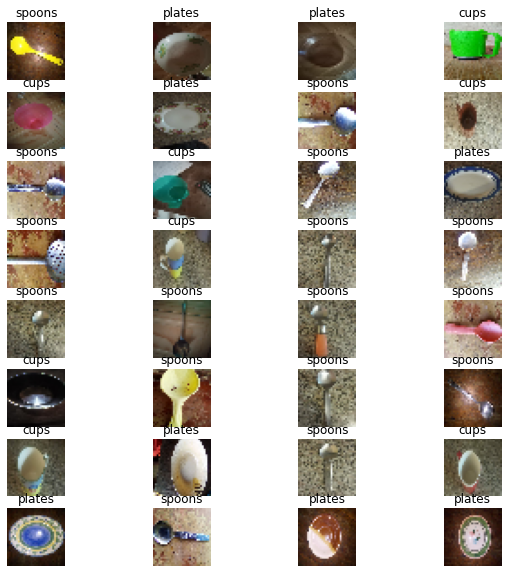

In [44]:
class_names = ["cups", "plates", "spoons"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [45]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [46]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [47]:
model.fit(
    train_ds,
    epochs = 10
)

Epoch 1/10
1/1 [==============================] - 1s 999ms/step - loss: 1.0885 - accuracy: 0.2812
Epoch 2/10
1/1 [==============================] - 0s 429ms/step - loss: 1.0542 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 432ms/step - loss: 1.0289 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 423ms/step - loss: 1.0117 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 429ms/step - loss: 1.0042 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 431ms/step - loss: 1.0062 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 435ms/step - loss: 1.0042 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 424ms/step - loss: 0.9944 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 432ms/step - loss: 0.9844 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 431ms/step - loss: 0.9778 - accuracy: 0.5000


In [48]:
model.evaluate(test_ds)

1/1 [==============================] - 0s 362ms/step - loss: 1.0407 - accuracy: 0.4667


[1.0407469272613525, 0.46666666865348816]

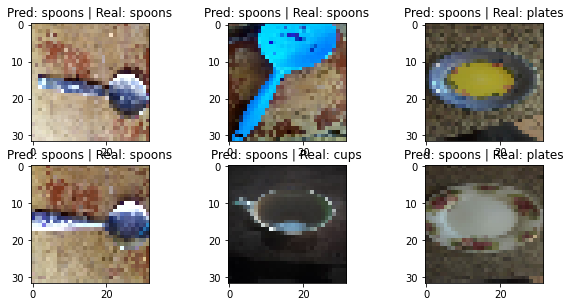

In [50]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(6):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [51]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)